In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from model import *

## General Notebook for Plotting Comparisons Between Models

In [ ]:
model = ConvNet4()
model.load_state_dict(torch.load('results/cnn4_full_xSmooth1.pt'))

In [32]:
v1 = np.load('cnn_full_xSmooth.npy').item()
v2 = np.load('cnn_full_xSmooth2.npy').item()
v3 = np.load('cnn_full_xSmooth3.npy').item()

result_list = [v1, v2, v3]
file_names = ['v1','v2','v3']

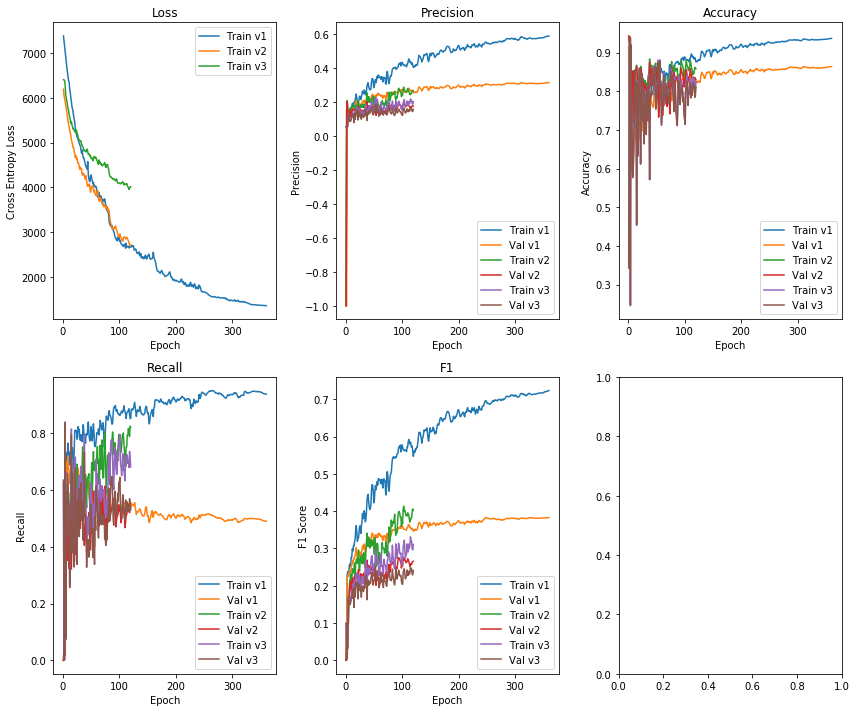

In [33]:
plot_result_list(result_list, file_names)

In [29]:
def plot_result_list(result_list, file_names, save_file='default', save=False):
    
    fig, ((ax1,ax2,ax5),(ax3,ax4,ax6)) = plt.subplots(2,3)
    
    for idx, results in enumerate(result_list):
        L = sorted(results.items())
        e, Z = zip(*L)

        loss, train_precision, train_recall, train_f1, train_acc = [], [], [], [], []
        val_precision, val_recall, val_f1, val_acc = [], [], [], []

        val_flag = False

        for i,z in enumerate(Z):
            loss.append(z[0])
            train_metrics, val_metrics = z[1], z[2]

            train_precision.append(train_metrics['precision'])
            train_recall.append(train_metrics['recall'])
            train_f1.append(train_metrics['F1 score'])
            train_acc.append(train_metrics['accuracy'])

            if val_metrics:
                val_flag = True
                val_precision.append(val_metrics['precision'])
                val_recall.append(val_metrics['recall'])
                val_f1.append(val_metrics['F1 score'])
                val_acc.append(val_metrics['accuracy'])        

        
        label = 'Train ' + file_names[idx]
        
        ax1.plot(e, loss, label=label)
        ax1.legend(loc='upper right')
        ax1.set_title('Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Cross Entropy Loss')

        ax2.plot(e, train_precision, label=label)
        ax2.legend(loc='lower right')
        ax2.set_title('Precision')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Precision')

        ax3.plot(e, train_recall, label=label)
        ax3.legend(loc='lower right')
        ax3.set_title('Recall')
        ax3.set_xlabel('Epoch')
        ax3.set_ylabel('Recall')

        ax4.plot(e, train_f1, label=label)
        ax4.legend(loc='lower right')
        ax4.set_title('F1')
        ax4.set_xlabel('Epoch')
        ax4.set_ylabel('F1 Score')
        
        
        ax5.plot(e, train_acc, label=label)
        ax5.legend(loc='lower right')
        ax5.set_title('Accuracy')
        ax5.set_xlabel('Epoch')
        ax5.set_ylabel('Accuracy')

        if val_flag:
            label = 'Val ' + file_names[idx]
            ax2.plot(e, val_precision, label=label)
            ax2.legend(loc='lower right')
            
            ax3.plot(e, val_recall, label=label)
            ax3.legend(loc='lower right')
            
            
            ax4.plot(e, val_f1, label=label)
            ax4.legend(loc='lower right')
            
            ax5.plot(e, val_acc, label=label)
            ax5.legend(loc='lower right')

    fig.set_size_inches(12, 10, forward=True)
    plt.tight_layout()
    
    if save:
        plt.savefig(save_file+'.png',dpi=300)
    plt.show()

